<a href="https://colab.research.google.com/github/kaioribeiro97/Credit_card_fraud_Machine_learning/blob/main/Credit_card_fraud_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # 1. Importando as bibliotecas





In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from google.colab import drive
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')


#modelos de machine learning
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#optuna
!pip install optuna 
import optuna
import xgboost as xgb
import sklearn.datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


> # Coletando os dados do kaggle

Utilizaremos uma api do kaggle para baixar o dataset direto para o drive

In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
drive.mount('/content/drive')

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [8]:
df = pd.read_csv('creditcard.csv')

In [9]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install -q scikit-plot

> # Preparando os dados

In [10]:
# importar os dados para um dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17% do dataset.


Transações normais representam 99.83% do dataset.



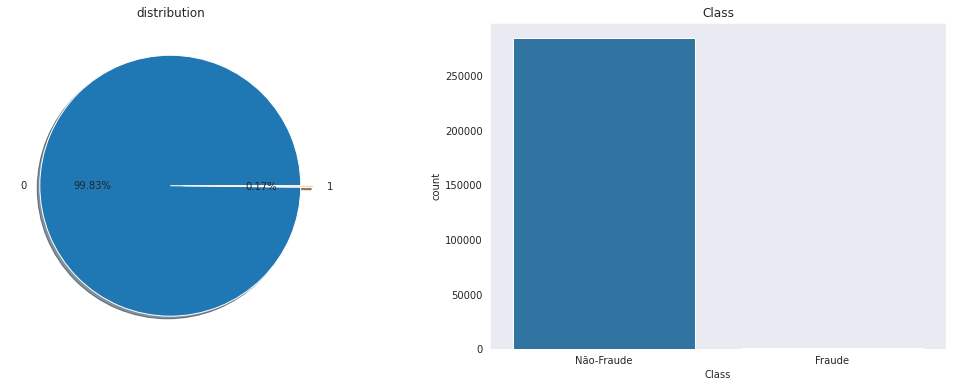

In [12]:

# ver o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.2f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))
print("\nTransações normais representam {:.2f}% do dataset.\n".format((df[df.Class == 0].shape[0] / df.shape[0]) * 100))
# plotar gráfico de barras para as Classes.
f,ax=plt.subplots(1,2,figsize=(18,6))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('distribution')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
plt.xticks([0,1],['Não-Fraude','Fraude'])
ax[1].set_title('Class')
plt.show()



vamos treinar o modelo com os dados desbalanceados para ver oque isso pode causar.

In [13]:
# separar variáveis entre X e y
X = df.drop('Class', axis=1)
y = df['Class']
# dividir o dataset entre treino e teste
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, shuffle=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9994    0.9994    0.9994     71079
           1     0.6694    0.6585    0.6639       123

    accuracy                         0.9988     71202
   macro avg     0.8344    0.8290    0.8317     71202
weighted avg     0.9988    0.9988    0.9988     71202

Acurácia: 0.9988

AUC: 0.8290



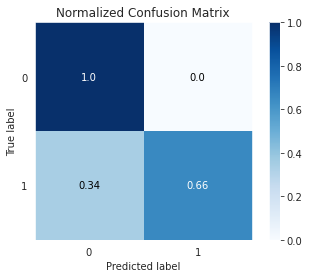

In [14]:
model = LogisticRegression()
model.fit(train_X, train_y)
# fazer as previsões em cima dos dados de teste
pred_y = model.predict(test_X)
proba_y = model.predict_proba(test_X)
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(test_y, pred_y, normalize=True)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(test_y, pred_y, digits=4))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(test_y, pred_y)))
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(test_y, pred_y)))

Nossos dados estão desbalanceados, para isso precisamos balancea-lo, Para balancear os dados, podemos utilizar duas tecnicas:

*   **Over-sampling**: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Essa geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de clustering ou sinteticamente.

* **Under-sampling**:  reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências.

Neste *dataset* utilizaremos a tecnica **Under-sampling**.

In [15]:
# create an under-sampled dataset
df = df.sample(frac=1)

df_fraude = df[df['Class'] == 1]
df__no_fraude = df[df['Class'] == 0][:492]

new_df = pd.concat([df_fraude, df__no_fraude])
new_df = new_df.sample(frac=1)

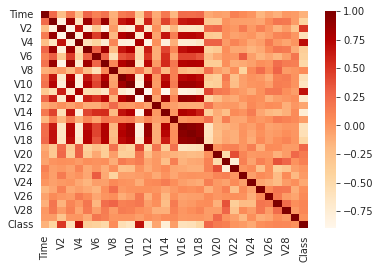

In [16]:
ax = sns.heatmap(new_df.corr(), cmap='OrRd')

A partide de agora nossas variaveis x e y são X_us e y_us pois os dados estarão balanceados

In [17]:
X_us = new_df.drop('Class', axis=1)
y_us = new_df['Class']

Balanceamento da classe
1    492
0    492
Name: Class, dtype: int64


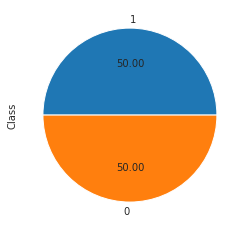

In [18]:
# ver o balanceamento das classes
print('Balanceamento da classe')
print(pd.Series(y_us).value_counts())

# plotar a nova distribuição de classes
y_us.value_counts().plot.pie(autopct='%.2f')

> # modelos preditivos

Será utilizado 5 modelos preditivos:


*   DecisioTreeClassifier
*   random_forest
*   RegressionLinear
*   Supor Vector Machine
*   XGBoost

In [19]:
(x_train,x_test,y_train,y_test) = train_test_split(X_us,y_us, test_size=0.2, random_state=42)
print("x_train size: ", x_train.shape)
print("x_ test size: ", x_test.shape)

x_train size:  (787, 30)
x_ test size:  (197, 30)


> ## RegressionLinear



In [20]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9533    0.9623    0.9577       106
           1     0.9556    0.9451    0.9503        91

    accuracy                         0.9543       197
   macro avg     0.9544    0.9537    0.9540       197
weighted avg     0.9543    0.9543    0.9543       197

Acurácia: 0.9543

AUC: 0.9537



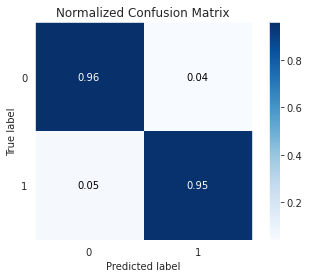

In [21]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

A primeira coisa que podemos observar é que apesar da acuracia ter dados uma diminuida, as outras métricas como F1-score, Precision, recall e a areá sobre a curva(AUC) aumentaram.

### Cross-validation

In [22]:

model = LogisticRegression()
kfold_validation=KFold(10)
results=cross_val_score(model,X_us,y_us,cv=kfold_validation)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [23]:
print(results)
print(np.mean(results))

[0.90909091 0.92929293 0.95959596 0.97979798 0.92857143 0.93877551
 0.95918367 0.90816327 0.93877551 0.92857143]
0.9379818594104309




> ## Modelo DecisionTreeClassifier






In [24]:

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       106
           1       0.87      0.91      0.89        91

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



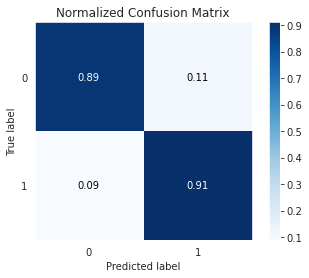

In [25]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Cross validation

In [26]:

model =  DecisionTreeClassifier()
kfold_validation=KFold(10)
results=cross_val_score(model,X_us,y_us,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.87878788 0.90909091 0.96969697 0.93939394 0.8877551  0.86734694
 0.8877551  0.90816327 0.90816327 0.86734694]
0.9023500309214596


----------

> ## Modelo random_forest

In [27]:
model = RandomForestClassifier(n_estimators=100)

In [28]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       106
           1       0.98      0.92      0.95        91

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



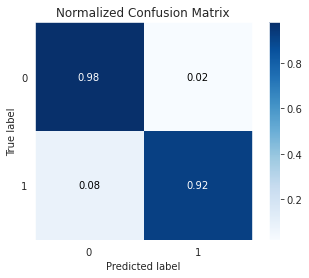

In [30]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Cross_validation


In [31]:
model =  RandomForestClassifier(n_estimators=100)
kfold_validation=KFold(10)
results=cross_val_score(model,X_us,y_us,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.8989899  0.93939394 0.97979798 0.97979798 0.90816327 0.90816327
 0.96938776 0.90816327 0.93877551 0.94897959]
0.9379612451041023


> ##  Support Vector Machines

In [32]:
from sklearn.svm import SVC
from sklearn import svm
model = svm.SVC() #select the algorithm
model.fit(x_train,y_train) # we train the algorithm with the training data and the training output
y_pred=model.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.47      0.53       106
           1       0.51      0.64      0.57        91

    accuracy                           0.55       197
   macro avg       0.56      0.55      0.55       197
weighted avg       0.56      0.55      0.55       197



### cross validation


In [34]:

model =  svm.SVC()
kfold_validation=KFold(10)
results=cross_val_score(model,X_us,y_us,cv=kfold_validation)

In [35]:
print(results)
print(np.mean(results))

[0.43434343 0.52525253 0.57575758 0.45454545 0.55102041 0.60204082
 0.47959184 0.55102041 0.6122449  0.59183673]
0.5377654091939806


> ## XGBoost

In [36]:
import pandas as pd
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.96      0.93      0.94        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



-----

### Cross-validation


In [38]:
model = XGBClassifier(n_jobs=-1)
kfold_validation=KFold(10)
results=cross_val_score(model,X_us,y_us,cv=kfold_validation)


In [39]:
print(results)
print(np.mean(results))

[0.90909091 0.93939394 0.97979798 0.97979798 0.91836735 0.92857143
 0.98979592 0.90816327 0.92857143 0.93877551]
0.9420325706039991




># Testanto com o dados de test original



In [40]:
(x_train,x_test,y_train,y_test) = train_test_split(X_us,y_us, test_size=0.2, random_state=42)
print("x_train size: ", x_train.shape)
print("x_ test size: ", x_test.shape)


x_train size:  (787, 30)
x_ test size:  (197, 30)


In [41]:
import pandas as pd
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)


XGBClassifier(n_jobs=-1)

In [42]:
#x_test y_test concantena
df = df[df['Class'] == 0][492:]

In [43]:
X_novo = df.drop('Class', axis=1)
y_novo = df['Class']
x_test = x_test.append(X_novo)
y_test = y_test.append(y_novo)
# testing
y_pred = model.predict(x_test)


In [44]:
print("x_train size: ", x_train.shape)
print("x_ test size: ", x_test.shape)
print("y_train size: ", y_train.shape)
print("y_ test size: ", y_test.shape)


x_train size:  (787, 30)
x_ test size:  (284020, 30)
y_train size:  (787,)
y_ test size:  (284020,)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    283929
           1       0.01      0.93      0.02        91

    accuracy                           0.97    284020
   macro avg       0.50      0.95      0.50    284020
weighted avg       1.00      0.97      0.98    284020



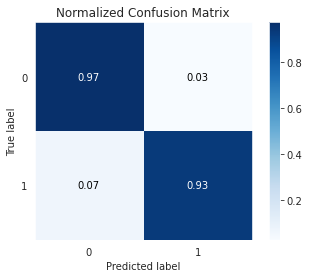

In [45]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)


Podemos observar que a precisão só obteve 1% para os valores 1, e o macro avg do f1-score ficou em 51%, oque não é um bom resultado, isso nos mostra que não foi muito bem generalizado. a melhor forma é lidar com o desbalanceamento com o próprio modelo.

> # Optuna

O processo de hyperparametrização será utilizando o modelo xgboost que obteve a maior acurácia. O optuna é um software de otimização automatica de hiperparametros.

In [46]:

"""
Optuna example that demonstrates a pruner for XGBoost.cv.
In this example, we optimize the validation auc of cancer detection using XGBoost.
We optimize both the choice of booster model and their hyperparameters. Throughout
training of models, a pruner observes intermediate results and stop unpromising trials.
You can run this example as follows:
    $ python xgboost_cv_integration.py
"""



def objective(trial):
    train_x, train_y = sklearn.datasets.load_breast_cancer(return_X_y=True)
    dtrain = xgb.DMatrix(train_x, label=train_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
         "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),  
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        
      

        
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "test-auc")
    history = xgb.cv(param, dtrain, num_boost_round=100, callbacks=[pruning_callback])

    mean_auc = history["test-auc-mean"].values[-1]
    return mean_auc


In [47]:
 pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)
 study = optuna.create_study(pruner=pruner, direction="maximize")
 study.optimize(objective, n_trials=100)

[I 2022-12-19 16:26:45,332] A new study created in memory with name: no-name-b7d17bf1-f0a9-40c0-9a6a-ba4b2ef2f891
[I 2022-12-19 16:26:45,691] Trial 0 finished with value: 0.9894046666666667 and parameters: {'booster': 'gbtree', 'lambda': 1.766955947726393e-08, 'alpha': 1.2881725465583985e-08, 'subsample': 0.7658755600590625, 'colsample_bytree': 0.9741817515341704, 'learning_rate': 0.02, 'max_depth': 3, 'eta': 0.021765381400256963, 'gamma': 0.002467859942101047, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9894046666666667.
[I 2022-12-19 16:26:46,350] Trial 1 finished with value: 0.9899686666666666 and parameters: {'booster': 'dart', 'lambda': 8.656486494062125e-08, 'alpha': 0.002273437730969947, 'subsample': 0.24537663574569202, 'colsample_bytree': 0.2752842876805242, 'learning_rate': 0.016, 'max_depth': 9, 'eta': 2.2742533168350475e-06, 'gamma': 1.2729487541378007e-07, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.42902

In [48]:
print("Number of finished trials: {}".format(len(study.trials)))

Number of finished trials: 100


In [49]:
#Retornando o melhor teste do estudo
trial = study.best_trial
print("Best trial:",trial)


Best trial: FrozenTrial(number=88, values=[0.9924276666666666], datetime_start=datetime.datetime(2022, 12, 19, 16, 27, 5, 810802), datetime_complete=datetime.datetime(2022, 12, 19, 16, 27, 6, 748985), params={'booster': 'dart', 'lambda': 0.0002907693433688159, 'alpha': 1.6858786712689633e-05, 'subsample': 0.6530310086566788, 'colsample_bytree': 0.21662405994504164, 'learning_rate': 0.016, 'max_depth': 7, 'eta': 1.6225832241960707e-07, 'gamma': 6.42183529447977e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 2.4006984171861265e-07, 'skip_drop': 4.0295343222648713e-05}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2,

In [50]:
#Retorna o valor no estudo.
print("  Value: {}".format(trial.value))

  Value: 0.9924276666666666


In [51]:
#Retorna os melhores parametros obtidos
print("  Params: ")
for key, value in trial.params.items():
      print("    {}: {}".format(key, value))

  Params: 
    booster: dart
    lambda: 0.0002907693433688159
    alpha: 1.6858786712689633e-05
    subsample: 0.6530310086566788
    colsample_bytree: 0.21662405994504164
    learning_rate: 0.016
    max_depth: 7
    eta: 1.6225832241960707e-07
    gamma: 6.42183529447977e-07
    grow_policy: lossguide
    sample_type: weighted
    normalize_type: forest
    rate_drop: 2.4006984171861265e-07
    skip_drop: 4.0295343222648713e-05


In [52]:
#cria um dataset
hist = study.trials_dataframe()
hist.head()


,number,value,datetime_start,datetime_complete,duration,params_alpha,params_booster,params_colsample_bytree,params_eta,params_gamma,params_grow_policy,params_lambda,params_learning_rate,params_max_depth,params_normalize_type,params_rate_drop,params_sample_type,params_skip_drop,params_subsample,state
0,0,0.989405,2022-12-19 16:26:45.336544,2022-12-19 16:26:45.690563,0 days 00:00:00.354019,1.288173e-08,gbtree,0.974182,0.021765,2.467860e-03,lossguide,1.766956e-08,0.020,3.0,NaN,NaN,NaN,NaN,0.765876,COMPLETE
1,1,0.989969,2022-12-19 16:26:45.694053,2022-12-19 16:26:46.349092,0 days 00:00:00.655039,2.273438e-03,dart,0.275284,0.000002,1.272949e-07,depthwise,8.656486e-08,0.016,9.0,forest,4.429029e-07,weighted,0.000359,0.245377,COMPLETE
2,2,0.990045,2022-12-19 16:26:46.352588,2022-12-19 16:26:46.983461,0 days 00:00:00.630873,1.363723e-03,dart,0.618852,0.000010,7.076522e-02,lossguide,4.596729e-02,0.020,5.0,forest,4.912747e-05,uniform,0.000327,0.897340,COMPLETE
3,3,0.908119,2022-12-19 16:26:46.987064,2022-12-19 16:26:47.135178,0 days 00:00:00.148114,1.354109e-01,gblinear,0.536535,NaN,NaN,NaN,1.055731e-08,0.008,NaN,NaN,NaN,NaN,NaN,0.488864,COMPLETE
4,4,0.969458,2022-12-19 16:26:47.138637,2022-12-19 16:26:47.311741,0 days 00:00:00.173104,2.281849e-07,gblinear,0.210421,NaN,NaN,NaN,1.066292e-03,0.008,NaN,NaN,NaN,NaN,NaN,0.366853,COMPLETE


In [53]:
# histórico de otimização
#É o histórico de uma melhor pontuação, o ponto azul é a pontuação desta tentativa e a linha vermelha mostra a melhor pontuação.
fig = optuna.visualization.plot_optimization_history(study)
fig.show();

In [54]:
#Cada cor mostra a curva de perda de cada tentativa.

optuna.visualization.plot_intermediate_values(study)

In [55]:
#mostra a importancia de cada parametro
fig = optuna.visualization.plot_param_importances(study)
fig.show();

In [56]:
#visualizando os melhores valores dos parametros
Best_trial = study.best_trial.params
Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial

{'booster': 'dart',
 'lambda': 0.0002907693433688159,
 'alpha': 1.6858786712689633e-05,
 'subsample': 0.6530310086566788,
 'colsample_bytree': 0.21662405994504164,
 'learning_rate': 0.016,
 'max_depth': 7,
 'eta': 1.6225832241960707e-07,
 'gamma': 6.42183529447977e-07,
 'grow_policy': 'lossguide',
 'sample_type': 'weighted',
 'normalize_type': 'forest',
 'rate_drop': 2.4006984171861265e-07,
 'skip_drop': 4.0295343222648713e-05,
 'n_estimators': 10000,
 'tree_method': 'gpu_hist'}

------

In [57]:
# utilizando no modelo

In [58]:
(x_train,x_test,y_train,y_test) = train_test_split(X_us,y_us, test_size=0.2, random_state=42)

In [59]:

print("x_train size: ", x_train.shape)
print("x_ test size: ", x_test.shape)

x_train size:  (787, 30)
x_ test size:  (197, 30)


In [60]:
import pandas as pd
model = XGBClassifier(booster = 'gbtree',colsample_bytree= 0.4933533504645762, eta = 0.0005013621400898083, gamma =  0.000026032460514886794 ,learning_rate =  0.018, max_depth= 4,
                      n_estimators = 10000, subsample = 0.8285445812511041, alpha = 0.000002457826265173811)
# training
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.96      0.97      0.97       106
           1       0.97      0.96      0.96        91

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

